In [1]:
import os
import ipdb
import glob
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

processing .. grad
processing .. ig
processing .. itg
processing .. sg005
processing .. shap
processing .. lime005
processing .. control
Explanation method: grad, Mean_1=3.945, median=4.073
Explanation method: ig, Mean_1=3.345, median=3.417
Explanation method: itg, Mean_1=2.614, median=2.764
Explanation method: sg005, Mean_1=-1.997, median=-2.048
Explanation method: shap, Mean_1=1.687, median=1.862
Explanation method: lime005, Mean_1=1.150, median=0.925
Explanation method: control, Mean_1=6.349, median=6.153
processing .. grad
processing .. ig
processing .. itg
processing .. sg005
processing .. shap
processing .. lime005
processing .. control
Explanation method: grad, Mean_1=6.175, median=6.099
Explanation method: ig, Mean_1=6.763, median=6.483
Explanation method: itg, Mean_1=6.281, median=6.392
Explanation method: sg005, Mean_1=3.949, median=3.380
Explanation method: shap, Mean_1=7.763, median=7.766
Explanation method: lime005, Mean_1=7.392, median=6.810
Explanation method: control, M

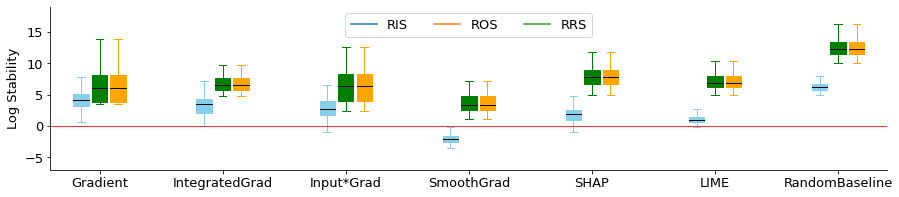

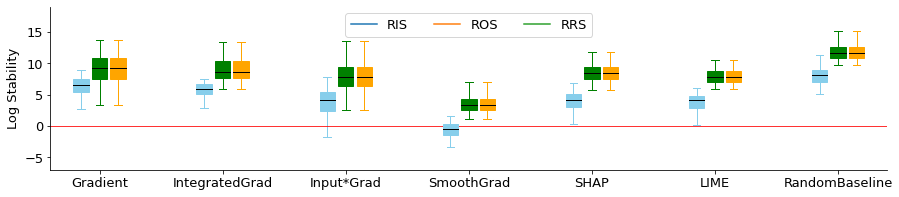

In [29]:
plt.rcParams.update({'font.size': 13})  # , 'font.weight': 'bold'})
# plt.rc('font', family='sans-serif')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='black')
# plt.rc('font', family='sans-serif')


# inits
algos = ['grad', 'ig', 'itg', 'sg005', 'shap', 'lime005', 'control'] #, 'pgmex', 'pgex']  # , 'gnnex', 'pgmex', 'pgex']

datasets =   ["adult", "compas"]
bernoullis = ["0.03"] #, "0.1"]
variances =  ["0.05"] #, "0.1"]
model_name = "ann" #need change for different models

stability_notions = ["stability2_diff_input", "stability2_diff_representation", "stability2_diff_output"] #["stability2_diff_input", "stability2_diff_representation", "stability2_diff_output"]

for data_name in datasets:
    plt.figure(figsize=(15, 3))
    plot_names = ["RIS", "ROS", "RRS"]
    plot_cols = ["skyblue", "green", "orange"]
    plots = []
    tick_val= -0.3
    for stab_ind,stability_notion in enumerate(stability_notions):
        
#         fig, ax = plt.subplots(1, 1, figsize=(15, 3))

        df = None 
        for it in range(len(bernoullis)):

            p = bernoullis[it]
            variance = variances[it]
            if it == 0:
                df = pd.read_csv("/Users/skrishna/Documents/phd_codes/bench2/XAI-benchmark/xai_benchmark/experiments/" + data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notion + ".csv")

            else:
                dfa = pd.read_csv("/Users/skrishna/Documents/phd_codes/bench2/XAI-benchmark/xai_benchmark/experiments/" +data_name + "_" + model_name + "_bernp="+ p + "_std=" + variance + "/" + stability_notion + ".csv")
#                 dfa = dfa.drop(columns="Unnamed: 0")
#                 dfa.loc[dfa['Std_Deviation'] == 0.05, 'Std_Deviation'] = str(variance)
#                 df = df.append(dfa, ignore_index=True)

        # Rename Std deviation column name since it's incorrect
#         df = df.rename(columns = {'Std_Deviation':'Variance'})
        df = df.rename(columns = {'Method':'Explanation Methods'})

        # Apply log transformation to Stability
        df['Stability'] = df['Stability'].apply(lambda x: np.log(x))
        df_sep = []

        for i, val in enumerate(algos):
            print("processing ..", val)
            df_sep.append(df[df["Explanation Methods"] == val]["Stability"].to_numpy())

        
        ## print statistics
        for i, val in enumerate(df_sep):
            print(f'Explanation method: {algos[i]}, Mean_1={np.mean(val):.3f}, median={np.median(df_sep[i]):.3f}')

        
        val = plt.boxplot(df_sep, positions=np.array(range(len(df_sep)))*2.0+tick_val, sym='', widths=0.25, patch_artist=True) #, boxprops=dict(facecolor='skyblue'))
        tick_val+=0.3
        plt.plot([], label=plot_names[stab_ind])
        set_box_color(val, plot_cols[stab_ind])
        
        
    #plt.legend(loc="center bottom")
    plt.legend(loc='upper center', ncol=3)
    plt.xticks(np.array(range(len(df_sep)))*2.0, ['Gradient', 'IntegratedGrad', 'Input*Grad', 'SmoothGrad', 'SHAP', 'LIME', 'RandomBaseline'])
    plt.ylim(-7, 19)
    plt.axhline(y=0, color='red', linewidth= 0.8)
    plt.ylabel("Log Stability")
    plt.savefig("overleaf_plots/"+data_name+"_"+model_name+".pdf",  bbox_inches='tight')
    
        
        
        